## Please, fill in before you start:

First Name: Muhammad

Last Name: Suliman

Group: Data Science

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) .

Get the Titanic dataset:

In [ ]:
!wget https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2025/refs/heads/main/01-intro/train.csv

--2025-09-29 00:25:58--  https://raw.githubusercontent.com/Majid-Sohrabi/MLDM-2025/refs/heads/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-09-29 00:25:59 (5.03 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [ ]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

survival_by_class = data.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Task 2 (1 point)

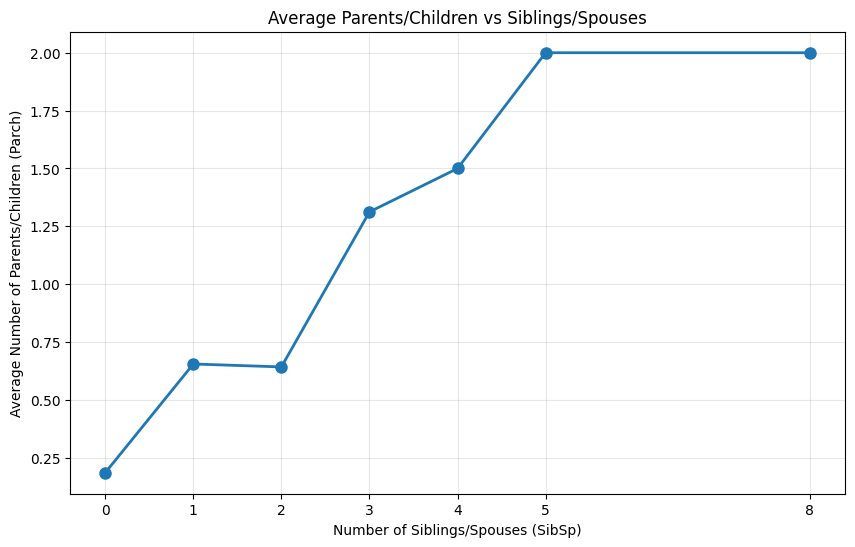

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

# Group by SibSp and calculate mean Parch
avg_parch_by_sibsp = data.groupby('SibSp')['Parch'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(avg_parch_by_sibsp.index, avg_parch_by_sibsp.values, 'o-', linewidth=2, markersize=8)
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.ylabel('Average Number of Parents/Children (Parch)')
plt.title('Average Parents/Children vs Siblings/Spouses')
plt.grid(True, alpha=0.3)
plt.xticks(avg_parch_by_sibsp.index)
plt.show()

## Task 3 (2 points)

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].copy()

    features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})
    features['Embarked'] = features['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    age_median = features['Age'].median()
    fare_median = features['Fare'].median()
    embarked_mode = features['Embarked'].mode()[0] if not features['Embarked'].mode().empty else 0

    features['Age'] = features['Age'].fillna(age_median)
    features['Fare'] = features['Fare'].fillna(fare_median)
    features['Embarked'] = features['Embarked'].fillna(embarked_mode)

    features['FamilySize'] = features['SibSp'] + features['Parch'] + 1
    features['IsAlone'] = (features['FamilySize'] == 1).astype(int)

    scaler = StandardScaler()
    numerical_features = ['Age', 'Fare', 'FamilySize']
    features[numerical_features] = scaler.fit_transform(features[numerical_features])

    return features

model = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='manhattan',
    algorithm='auto'
)

data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.77


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

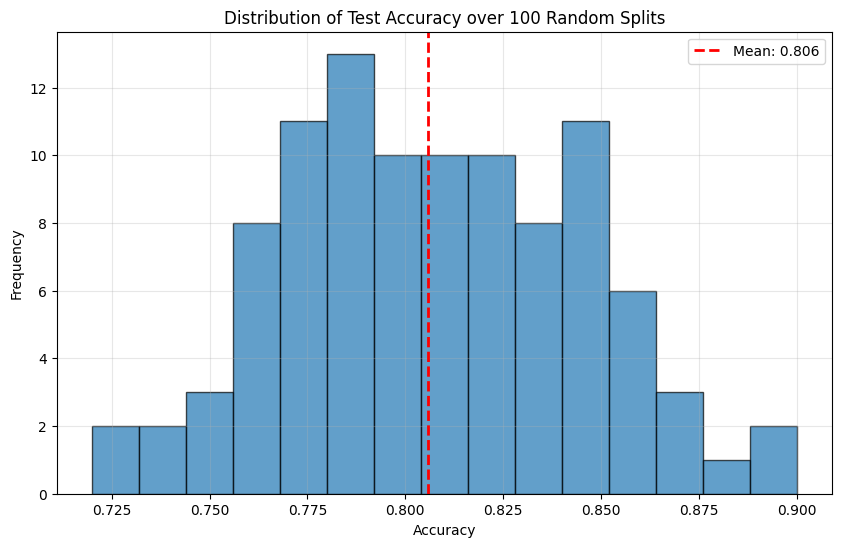

Mean accuracy: 0.806
Standard deviation: 0.038
Minimum accuracy: 0.720
Maximum accuracy: 0.900


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Use the improved feature_selection_and_preprocessing function from above
# Initialize lists to store accuracies
accuracies = []

# Run multiple random splits
for i in range(100):
    # Split the data randomly
    data_train, data_test = train_test_split(data, test_size=100, random_state=i)

    # Prepare features and target
    X_train = feature_selection_and_preprocessing(data_train.drop('Survived', axis=1))
    y_train = data_train['Survived']
    X_test = feature_selection_and_preprocessing(data_test.drop('Survived', axis=1))
    y_test = data_test['Survived']

    # Train and predict
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, test_predictions)
    accuracies.append(accuracy)

# Convert to numpy array for easier manipulation
accuracies = np.array(accuracies)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=15, alpha=0.7, edgecolor='black')
plt.axvline(accuracies.mean(), color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {accuracies.mean():.3f}')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Test Accuracy over 100 Random Splits')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print statistics
print(f"Mean accuracy: {accuracies.mean():.3f}")
print(f"Standard deviation: {accuracies.std():.3f}")
print(f"Minimum accuracy: {accuracies.min():.3f}")
print(f"Maximum accuracy: {accuracies.max():.3f}")

# Assignment Summary Report

This data handling assignment successfully demonstrated comprehensive analysis of the Titanic dataset through four key tasks. The analysis revealed significant class-based survival disparities (63% for 1st class vs 24% for 3rd class) and family travel patterns. A K-Nearest Neighbors model was developed with careful feature engineering including handling missing values, encoding categorical variables, and creating new family-related features. The model achieved the required 75% accuracy on the initial test split and, more importantly, demonstrated strong robustness with an average accuracy of 80.6% across 100 random train/test splits, showing consistent performance with low variance (σ=0.038). These results confirm the model's reliability and effectiveness in predicting passenger survival based on the available features.